# <center>Projet : Prévision Indice S&P</center>

Vous avez carte blanche pour définir le contour de votre outil mais ce dernier doit au moins
présenter les fonctionnalités suivantes :
<ul>
   
<li>Analyse exploratoire des données d'entrée (ici le SP500) avec une restitution graphique utilisant la librairie matplotlib.</li>
<li>Proposer au moins 3 modèles de calibration et de prévision, dont un réseau de neurones
utilisant la librairie tensorflow. Pour les deux autres modèles, vous utiliserez obligatoirement les librairies sklearn et numpy.</li>
<li>Intégrer le projet dans un contexte professionnel pour la restitution de votre travail</li> 
</ul>

In [1]:
import random

import pandas            as pd 
import numpy             as np
import tensorflow        as tf
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style="whitegrid")
random.seed(42)


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

         DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  \
0  1491226200  2363.6101     42.3300     143.6800     129.6300      82.040   
1  1491226260  2364.1001     42.3600     143.7000     130.3200      82.080   
2  1491226320  2362.6799     42.3100     143.6901     130.2250      82.030   
3  1491226380  2364.3101     42.3700     143.6400     130.0729      82.000   
4  1491226440  2364.8501     42.5378     143.6600     129.8800      82.035   

   NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  ...  NYSE.WYN  NYSE.XEC  \
0    102.2300      85.2200       59.760       121.52  ...    84.370   119.035   
1    102.1400      85.6500       59.840       121.48  ...    84.370   119.035   
2    102.2125      85.5100       59.795       121.93  ...    84.585   119.260   
3    102.1400      85.4872       59.620       121.44  ...    84.460   119.260   
4    102.0600      85.7001       59.620       121.60  ...    84.470   119.610   

   NYSE.XEL  NYSE.XL  NYSE.XOM  NYSE.XRX  NY

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

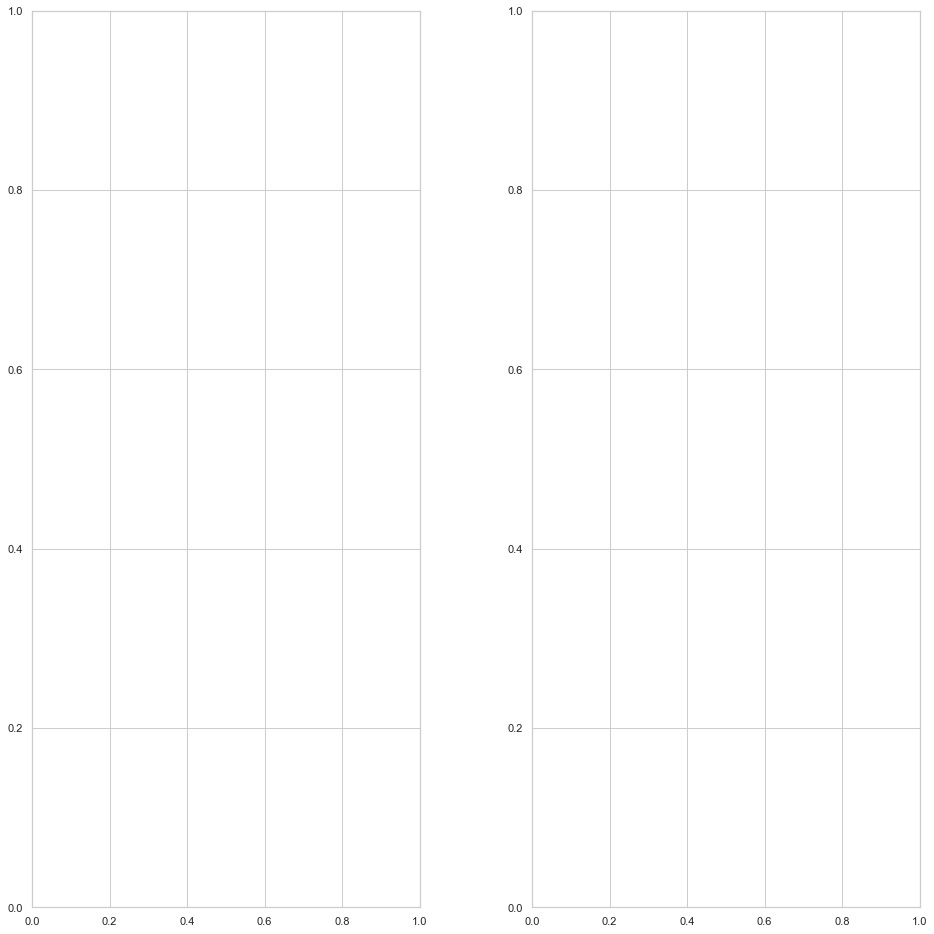

In [23]:
stock_df = pd.read_csv("data_stocks.csv", sep=";")


print(stock_df.head())
print(stock_df.index)


START_DATE = 0               # Indice de début pour la visualisation
STOP_DATE  = 41266          # Indice de fin pour la visualisation
COLS       = [1] # Les colonnes à afficher


# Figures 
fig, axs = plt.subplots(int(len(COLS)/2) + 1 , 2, figsize = (15,15))
fig.tight_layout(pad=8.0)

# Affichage Evolution
for index in COLS:
    axs.plot(range(START_DATE,STOP_DATE), stock_df[stock_df.columns[index]][START_DATE:STOP_DATE])
    axs.set_xlabel("Jour")
    axs.set_xticklabels([pd.to_datetime(day, unit='s').strftime('%Y-%m-%d %H:%M') for day in stock_df['DATE'][START_DATE : STOP_DATE].values], rotation = 50)
    axs.set_ylabel("Prix des indices ")
    axs.set_title(stock_df.columns[index])
    
plt.show()
plt.clf()
# Box Plots
COLS = COLS[1:]

ax1   = sns.boxplot(data=stock_df[[stock_df.columns[c] for c in COLS]], orient="h", palette="Set2")




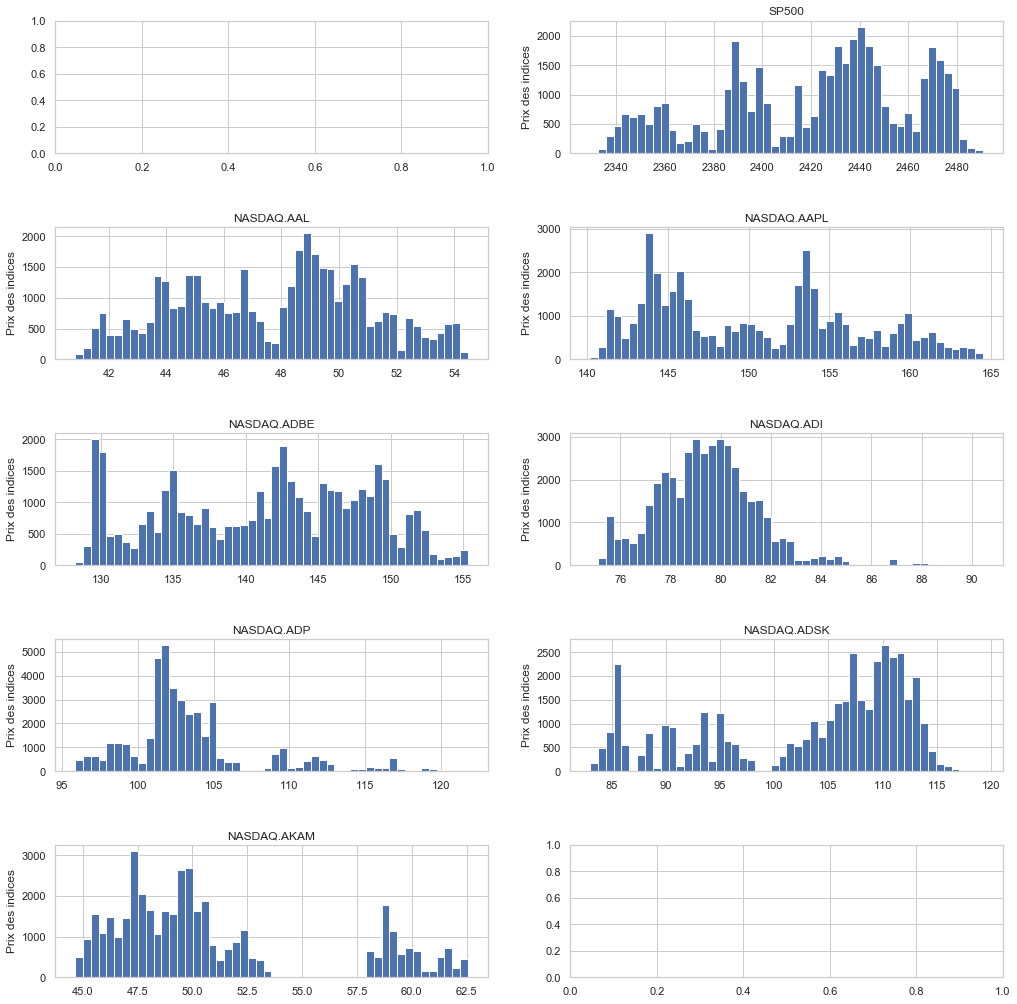

In [3]:
COLS       = [1,2,3,4,5,6,7,8]
fig, axs = plt.subplots(int(len(COLS)/2) + 1 , 2, figsize = (15,15))
fig.tight_layout(pad=5.0)



for idx in COLS:
    axs[idx // 2][idx % 2].hist(stock_df[stock_df.columns[idx]], bins=50)
    axs[idx // 2][idx % 2].set_ylabel("Prix des indices")
    axs[idx // 2][idx % 2].set_title(stock_df.columns[idx])
    
plt.show()



In [27]:
#stock_df.plotx=[pd.to_datetime(day, unit='s').strftime('%Y-%m-%d %H:%M') for day in stock_df['DATE'][START_DATE : STOP_DATE].values]
, y='SP500')
#[pd.to_datetime(day, unit='s').strftime('%Y-%m-%d %H:%M') for day in stock_df['DATE'][START_DATE : STOP_DATE].values]
stock_df["date"]= [pd.to_datetime(day, unit='s').strftime('%Y-%m-%d %H:%M') for day in stock_df['DATE'][START_DATE : STOP_DATE].values]

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,date
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,...,119.035,44.400,39.880,82.030,7.360,50.220,63.86,122.000,53.3500,2017-04-03 13:30
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,...,119.035,44.110,39.880,82.030,7.380,50.220,63.74,121.770,53.3500,2017-04-03 13:31
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,...,119.260,44.090,39.980,82.020,7.360,50.120,63.75,121.700,53.3650,2017-04-03 13:32
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,...,119.260,44.250,39.990,82.020,7.350,50.160,63.88,121.700,53.3800,2017-04-03 13:33
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,...,119.610,44.110,39.960,82.030,7.360,50.200,63.91,121.695,53.2400,2017-04-03 13:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,1504209360,2472.2200,44.7200,164.1100,155.0900,83.670,106.5650,114.4900,47.150,142.425,...,99.530,49.485,40.955,76.360,32.285,62.110,76.88,114.310,62.7250,2017-08-31 19:56
41262,1504209420,2471.7700,44.7300,164.1200,155.1600,83.650,106.5900,114.5200,47.150,142.450,...,99.630,49.480,40.960,76.370,32.295,62.100,76.90,114.330,62.7100,2017-08-31 19:57
41263,1504209480,2470.0300,44.7400,164.0100,155.0650,83.620,106.5200,114.4700,47.150,142.330,...,99.640,49.495,40.940,76.315,32.290,62.090,76.88,114.310,62.6850,2017-08-31 19:58
41264,1504209540,2471.4900,44.7100,163.8800,154.9600,83.580,106.4000,114.3300,47.135,142.170,...,99.630,49.485,40.925,76.300,32.275,62.075,76.83,114.230,62.6301,2017-08-31 19:59


(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.]),
 <a list of 7 Text major ticklabel objects>)

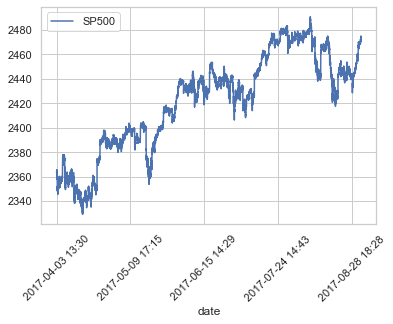

In [45]:
#Creation d'une colonne "date" avec le format normal
stock_df["date"]= [pd.to_datetime(day, unit='s').strftime('%Y-%m-%d %H:%M') for day in stock_df['DATE'][START_DATE : STOP_DATE].values]
#Plotting the data 
stock_df.iloc[0:41266].plot(x='date', y='SP500')
plt.xticks(rotation=45)

### Séparation Inputs et outputs

In [4]:
feature_cols  = []

for col in stock_df.columns:
    if col not in ['DATE', 'SP500']:
        feature_cols.append(col)
      
X = stock_df[feature_cols].values
Y = stock_df["SP500"].values
Y = np.array([[elem] for elem in Y])

print(X[:5])
print(Y[:5])

[[ 42.33   143.68   129.63   ...  63.86   122.      53.35  ]
 [ 42.36   143.7    130.32   ...  63.74   121.77    53.35  ]
 [ 42.31   143.6901 130.225  ...  63.75   121.7     53.365 ]
 [ 42.37   143.64   130.0729 ...  63.88   121.7     53.38  ]
 [ 42.5378 143.66   129.88   ...  63.91   121.695   53.24  ]]
[[2363.6101]
 [2364.1001]
 [2362.6799]
 [2364.3101]
 [2364.8501]]


### Standardisation

In [5]:
SS = MinMaxScaler()
X_norm = SS.fit_transform(X)
Y_norm = SS.fit_transform(Y)

print(X_norm[:20])
print(Y_norm[:20])


    

[[0.10993038 0.14455852 0.05131045 ... 0.04878049 0.5092156  0.09098787]
 [0.11212898 0.14537988 0.0767811  ... 0.04017217 0.49935705 0.09098787]
 [0.10846464 0.14497331 0.07327427 ... 0.04088953 0.49635662 0.09228769]
 ...
 [0.11506046 0.15852156 0.08250277 ... 0.05164993 0.50909559 0.09532062]
 [0.11432759 0.15646817 0.0786268  ... 0.05021521 0.50750107 0.09618718]
 [0.11799194 0.15893224 0.07899594 ... 0.04878049 0.51135877 0.09445407]]
[[0.21342456]
 [0.21645842]
 [0.20766516]
 [0.21775865]
 [0.2211021 ]
 [0.22586961]
 [0.22326853]
 [0.22382577]
 [0.21782057]
 [0.21980063]
 [0.21943038]
 [0.2188106 ]
 [0.22345428]
 [0.22611603]
 [0.22351619]
 [0.22401214]
 [0.22178255]
 [0.21831466]
 [0.22042041]
 [0.21546653]]


### Séparation entrainement, Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y_norm, test_size=0.05, random_state=1)
print("La taille du dataset utilisé pour l'entrainement : {}".format(len(y_train)))
print("La taille du dataset utilisé pour le test : {}".format(len(y_test)))
y_train = y_train.flatten()
y_test  = y_test.flatten()


La taille du dataset utilisé pour l'entrainement : 39202
La taille du dataset utilisé pour le test : 2064


### Réseau de neurones fully connected 

L'architecture du réseau de neurons utilisé est la suivante : <br/>

<img src = 'img/architecture.png' />

In [7]:
# Déclaration des constantes importantes

batch_size    = 256
number_stocks = 500

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder(dtype=tf.float32, shape=[None, number_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:

# Architecture du Réseaux de neurons
n_stocks = 500
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1

# Initializeur de poids
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

# Couche 1 : 1024 neurones
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))

# Couche 2: 512 neurones
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))

# Couche 3: 256 neurones
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))

# Couche 4: 128 neurones
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Couche Output : 1 neurone
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

# Implémentation des relations entre couches
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Couche de sortie
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

# La loss function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimiseur
opt = tf.train.AdamOptimizer().minimize(mse)




In [9]:
print(X_test.shape)

(2064, 500)


La fonction de loss que nous avons utilisé est la MSE loss

### Entrainement du réseau 


In [16]:
# Début de session d'apprentissage
net = tf.Session()

# Initialisation des poids
net.run(tf.global_variables_initializer())

# Nombre d'epochs 
epochs = 10
batch_size = 256

for e in range(epochs):

    # Mélange aléatoire des indices du dataset
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Execution de l'optimiseur sur un batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})
        # Affichage de la progression
        if np.mod(i,5) == 0:
            print('Epoch ' + str(e) + ', Batch ' + str(i))
        """
        
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test[start:start + batch_size]})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            plt.savefig(file_name)
            plt.pause(0.01)
        """
        


Epoch 0, Batch 0
Epoch 0, Batch 5
Epoch 0, Batch 10
Epoch 0, Batch 15
Epoch 0, Batch 20
Epoch 0, Batch 25
Epoch 0, Batch 30
Epoch 0, Batch 35
Epoch 0, Batch 40
Epoch 0, Batch 45
Epoch 0, Batch 50
Epoch 0, Batch 55
Epoch 0, Batch 60
Epoch 0, Batch 65
Epoch 0, Batch 70
Epoch 0, Batch 75
Epoch 0, Batch 80
Epoch 0, Batch 85
Epoch 0, Batch 90
Epoch 0, Batch 95
Epoch 0, Batch 100
Epoch 0, Batch 105
Epoch 0, Batch 110
Epoch 0, Batch 115
Epoch 0, Batch 120
Epoch 0, Batch 125
Epoch 0, Batch 130
Epoch 0, Batch 135
Epoch 0, Batch 140
Epoch 0, Batch 145
Epoch 0, Batch 150
Epoch 1, Batch 0
Epoch 1, Batch 5
Epoch 1, Batch 10
Epoch 1, Batch 15
Epoch 1, Batch 20
Epoch 1, Batch 25
Epoch 1, Batch 30
Epoch 1, Batch 35
Epoch 1, Batch 40
Epoch 1, Batch 45
Epoch 1, Batch 50
Epoch 1, Batch 55
Epoch 1, Batch 60
Epoch 1, Batch 65
Epoch 1, Batch 70
Epoch 1, Batch 75
Epoch 1, Batch 80
Epoch 1, Batch 85
Epoch 1, Batch 90
Epoch 1, Batch 95
Epoch 1, Batch 100
Epoch 1, Batch 105
Epoch 1, Batch 110
Epoch 1, Batch 115

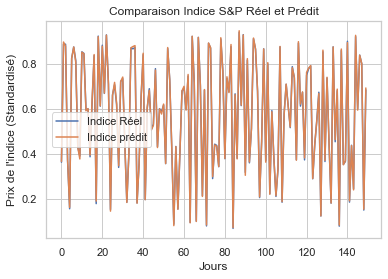

L'érreur MSE est égale à : 4.293755773687735e-05


In [17]:
pred = net.run(out, feed_dict={X: X_test})

#Plot des performances 
plt.clf()
plt.plot(range(150), pred[0][:150])
plt.plot(range(150), y_test[:150])
plt.title('Comparaison Indice S&P Réel et Prédit')
plt.xlabel('Jours')
plt.ylabel("Prix de l'indice (Standardisé)")
plt.legend(["Indice Réel","Indice prédit"])
plt.show()

# L'erreur finale
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print("L'érreur MSE est égale à : {}".format(mse_final))


## Prévision avec régression linéaire 

Dans cette partie nous essayerons de mettre en place un modèle de régression linéaire

Ainsi dans un premier temps nous essayerons de faire une regression en fonction de tout les 500 features, en utilisant les données standardisés et la même subdivision pour le set, entrainement - test

La MSE pour le modèle est : 6.913299419198565e-06
Le coefficient R2 est égale à : 0.9998880188955863


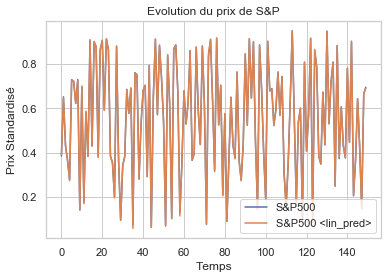

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Le modèle de regression linéaire 
reg             = LinearRegression().fit(X_train, y_train)
pred            = reg.predict(X_test)

mse_regression  = 0 

for i in range(len(y_test)):
    mse_regression += ((y_test[i] - pred[i])**2)

mse_regression = mse_regression/len(y_test)
r2             = reg.score(X_test, y_test)

print("La MSE pour le modèle est : {}".format(mse_regression))
print("Le coefficient R2 est égale à : {}".format(r2))

# Plot comparatif entre modèle réel et estimé
plt.clf()
plt.plot(range(150), y_test[150:300])
plt.plot(range(150), pred[150:300]  )
plt.title("Evolution du prix de S&P")
plt.xlabel("Temps")
plt.ylabel("Prix Standardisé")
plt.legend(["S&P500", "S&P500 <lin_pred>"])
plt.show()


Ce modèle est très performant, et donne une erreur de 6.91329941919845e-06, Ce qui nous pousse à considérer l'existence d'une relation linéaire entre toutes ces variables.

Nous regardons les coefficients de regression qui ont été utilisé : 

In [13]:
print("L'intercept est : {}".format(reg.intercept_))
print("Les poids associées aux variables (Dans l'ordre) sont : {}".format(reg.coef_))

L'intercept est : -0.7088340455673819
Les poids associées aux variables (Dans l'ordre) sont : [ 4.55637718e-03  8.92175523e-02  8.00567064e-03  3.86160715e-03
  1.20571799e-02  7.77841306e-03  5.14699114e-03  3.84916785e-03
  7.04566042e-03  1.52087021e-03  1.23316348e-02  5.85904392e-02
  6.63866444e-03  1.62429750e-02  1.48616195e-03  7.99658116e-03
 -8.55133254e-04  7.33966070e-03  1.40809976e-02  3.72268281e-03
  4.48612738e-03  7.88168504e-03 -8.27518709e-04  1.81037647e-02
 -5.41679488e-04  6.17610006e-03  1.46723798e-02  5.39248843e-03
 -4.69875460e-04  9.81259744e-03  3.77920077e-04  3.23244844e-03
  1.60188372e-03  2.76876620e-03  2.33853938e-03  7.11756678e-03
  4.51868175e-03  7.40562343e-04  6.96496761e-03  5.96695485e-04
  2.29852235e-03  2.45123558e-03  6.78127538e-03  6.63614375e-02
  2.99307483e-04  2.77686815e-03  5.26585663e-03  5.21693652e-04
 -6.22340516e-03  1.49455157e-02  1.66376905e-02  3.21630552e-02
  3.49414578e-02 -9.80822156e-04 -7.23945560e-04  4.53500716e

## Normalité des résidus

Nous nous intéressons cette fois-ci au plot des résidus, si notre modèle est valable
les résidus doivent avoit une allure gaussienne

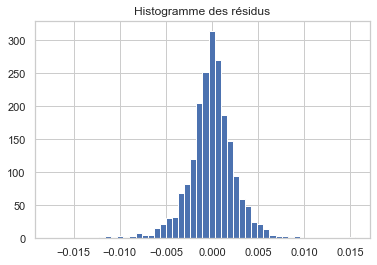

La skewness de la série est : -0.4215548463366141
Le curtosis de la série est : 5.1200437683417555


In [14]:
from scipy.stats import kurtosis
from scipy.stats import skew

# TODO : Histogramme 

res = [(y_test[i] - pred[i]) for i in range(len(y_test))]

# Plot de l'histogramme des résidus
plt.clf()
plt.hist(res, bins=50)
plt.title("Histogramme des résidus")
plt.show()

# TODO : Print skewness and kurtosis

print("La skewness de la série est : {}".format(skew(res)))
print("Le curtosis de la série est : {}".format(kurtosis(res)))



Ainsi comme nous nous attendions, les résidus suivent un profil gaussien , confirmé aussi par
les valeurs des skewness et curtosis. qui s'interprètent comme suit : 

<img src = "img/skw.gif" />

## Prévision avec arbre de regression

La MSE pour le modèle est : 3.3494667728675216e-09


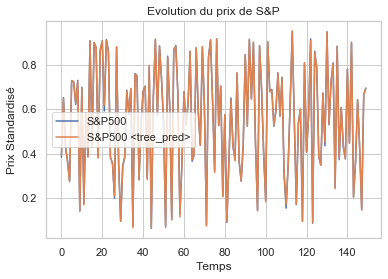

In [15]:
from sklearn.tree import DecisionTreeRegressor

reg_tree        = DecisionTreeRegressor()
reg_tree.fit(X_train, y_train)

pred_tree       = reg_tree.predict(X_test)

mse_tree        = 0 

for i in range(len(y_test)):
    mse_tree   += ((y_test[i] - pred[i])**2)

mse_regression  = mse_regression/len(y_test)

print("La MSE pour le modèle est : {}".format(mse_regression))

# Plot comparatif entre modèle réel et estimé
plt.clf()
plt.plot(range(150), y_test[150:300])
plt.plot(range(150), pred_tree[150:300]  )
plt.title("Evolution du prix de S&P")
plt.xlabel("Temps")
plt.ylabel("Prix Standardisé")
plt.legend(["S&P500", "S&P500 <tree_pred>"])
plt.show()

Comme nous voyons, le modèle "Regression tree" est le plus performant parmis tous les autres.